I found a database to explore the relationship between average incomes in Toronto with other factors, like whether the residents rent or own, and whether they use public transportation.

Import json file for Toronto Neighborhood demographics

In [34]:
import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim
address = 'Toronto'

#geolocator = Nominatim(user_agent="toronto_explorer")
geolocator = Nominatim(user_agent="toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Toronto are {}, {}.'.format(latitude, longitude))

The geograpical coordinate of Toronto are 43.6534817, -79.3839347.


Here's a map derived from the latitude and longitude values.

In [3]:
import folium # map rendering library
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=10)

# add markers to map
#for lat, lng, borough, neighborhood in zip(neighborhoods['Latitude'], neighborhoods['Longitude'], neighborhoods['Borough'], neighborhoods['Neighborhood']):
#    label = '{}, {}'.format(neighborhood, borough)
#    label = folium.Popup(label, parse_html=True)
#    folium.CircleMarker(
#        [lat, lng],
#        radius=5,
#        popup=label,
#        color='blue',
#        fill=True,
#        fill_color='#3186cc',
#        fill_opacity=0.7,
#        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [1]:
import pandas as pd
df_code = pd.read_html('https://en.wikipedia.org/wiki/Demographics_of_Toronto_neighbourhoods')[1]

Here's a sample of that data.

In [2]:
df_code.head()

,Name,FM,Census Tracts,Population,Land area (km2),Density (people/km2),% Change in Population since 2001,Average Income,Transit Commuting %,% Renters,Second most common language (after English) by name,Second most common language (after English) by percentage,Map
0,Toronto CMA Average,NaN,All,5113149,5903.63,866,9.0,40704,10.6,11.4,NaN,NaN,NaN
1,Agincourt,S,"0377.01, 0377.02, 0377.03, 0377.04, 0378.02, 0...",44577,12.45,3580,4.6,25750,11.1,5.9,Cantonese (19.3%),19.3% Cantonese,NaN
2,Alderwood,E,"0211.00, 0212.00",11656,4.94,2360,-4.0,35239,8.8,8.5,Polish (6.2%),06.2% Polish,NaN
3,Alexandra Park,OCoT,0039.00,4355,0.32,13609,0.0,19687,13.8,28.0,Cantonese (17.9%),17.9% Cantonese,NaN
4,Allenby,OCoT,0140.00,2513,0.58,4333,-1.0,245592,5.2,3.4,Russian (1.4%),01.4% Russian,NaN


We're interested in the columns related to population, income % renters and transportation habits, so we remove other columns

In [3]:
df_code.drop(df_code.columns[[1,2,6,10,11,12]],axis=1,inplace=True)

In [4]:
#df.drop(df.columns[[0, 4, 2]], axis = 1, inplace = True)
df_code.head()

,Name,Population,Land area (km2),Density (people/km2),Average Income,Transit Commuting %,% Renters
0,Toronto CMA Average,5113149,5903.63,866,40704,10.6,11.4
1,Agincourt,44577,12.45,3580,25750,11.1,5.9
2,Alderwood,11656,4.94,2360,35239,8.8,8.5
3,Alexandra Park,4355,0.32,13609,19687,13.8,28.0
4,Allenby,2513,0.58,4333,245592,5.2,3.4


We're separate out the first row, which summarizes all the rest of the data. We might use it later so we save it.

In [5]:
df_toronto = df_code.iloc[0]

Now we have just neighborhood data.

In [6]:
df_toronto.head()

Name                    Toronto CMA Average
Population                          5113149
Land area (km2)                     5903.63
Density (people/km2)                    866
Average Income                        40704
Name: 0, dtype: object

In [11]:
df_code.drop(df_code.index[0],inplace=True)

Here's the final frame we will study.

In [7]:
df_code.tail()

,Name,Population,Land area (km2),Density (people/km2),Average Income,Transit Commuting %,% Renters
170,Woburn,48507,13.34,3636,26190,13.3,16.0
171,Wychwood,4182,0.68,6150,53613,17.1,20.1
172,York Mills,17564,7.29,2409,92099,10.0,11.8
173,York University Heights,26140,13.21,1979,24432,15.2,20.4
174,Yorkville,6045,0.56,10795,105239,18.3,27.9


In [8]:
# use the inline backend to generate the plots within the browser
%matplotlib inline 

import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.style.use('ggplot') # optional: for ggplot-like style

# check for latest version of Matplotlib
print ('Matplotlib version: ', mpl.__version__) # >= 2.0.0

Matplotlib version:  2.2.2


Let's first look at income distribution

In [9]:
import numpy as np
#df_code['Average Income'].head(10)
count, bin_edges = np.histogram(df_code['Average Income'])

print(count) # frequency count
print(bin_edges) # bin ranges, default = 10 bins

[134  14  15   6   1   0   3   1   0   1]
[ 19521.   48979.6  78438.2 107896.8 137355.4 166814.  196272.6 225731.2
 255189.8 284648.4 314107. ]


In [79]:
df_code.dtypes

Name                     object
Population                int64
Land area (km2)         float64
Density (people/km2)      int64
Average Income            int64
Transit Commuting %     float64
% Renters               float64
dtype: object

We will first generate a histogram of income distributions

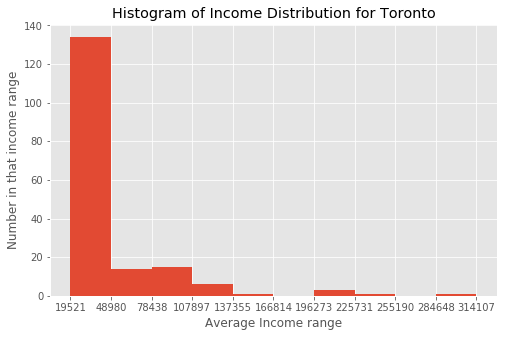

In [10]:
#df_code['Average Income'].plot(kind='hist', figsize=(8, 5))
df_code['Average Income'].plot(kind='hist', figsize=(8, 5), xticks=bin_edges)
plt.title('Histogram of Income Distribution for Toronto') # add a title to the histogram
plt.ylabel('Number in that income range') # add y-label
plt.xlabel('Average Income range') # add x-label

plt.show()

Let's try to explore correlations between the variables. First, at low ends of the income scale there is a higher percentage of renters, but also a lot of variability. At high ends of the income scale, there are fewer data points but the suggestion is that there are fewer renters.

<Figure size 1440x720 with 0 Axes>

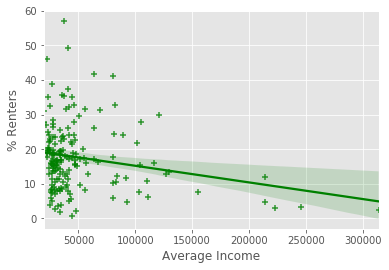

<Figure size 1440x720 with 0 Axes>

In [12]:
import seaborn as sns
ax = sns.regplot(x='Average Income', y='% Renters', data=df_code, color='green', marker='+')
plt.figure(figsize=(20, 10))

A similar trend seems to hold between income and the number of those who use public transport.

<Figure size 1440x720 with 0 Axes>

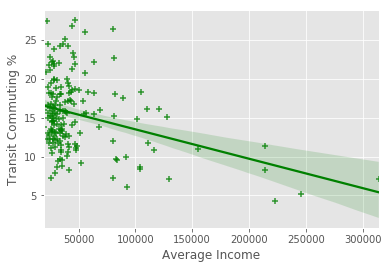

<Figure size 1440x720 with 0 Axes>

In [13]:
ax = sns.regplot(x='Average Income', y='Transit Commuting\xa0%', data=df_code, color='green', marker='+')
plt.figure(figsize=(20, 10))

Another histogram of the data pairing income with renting

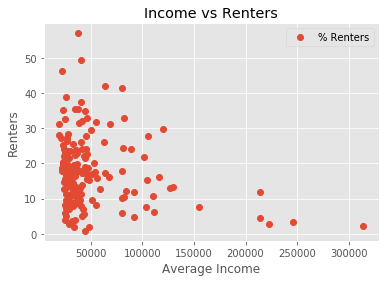

In [15]:
df_code.plot(x='Average Income', y='% Renters', style='o')  
plt.title('Income vs Renters')  
plt.xlabel('Average Income')  
plt.ylabel('Renters')  
plt.show()

I used seaborn to show the distribution of incomes

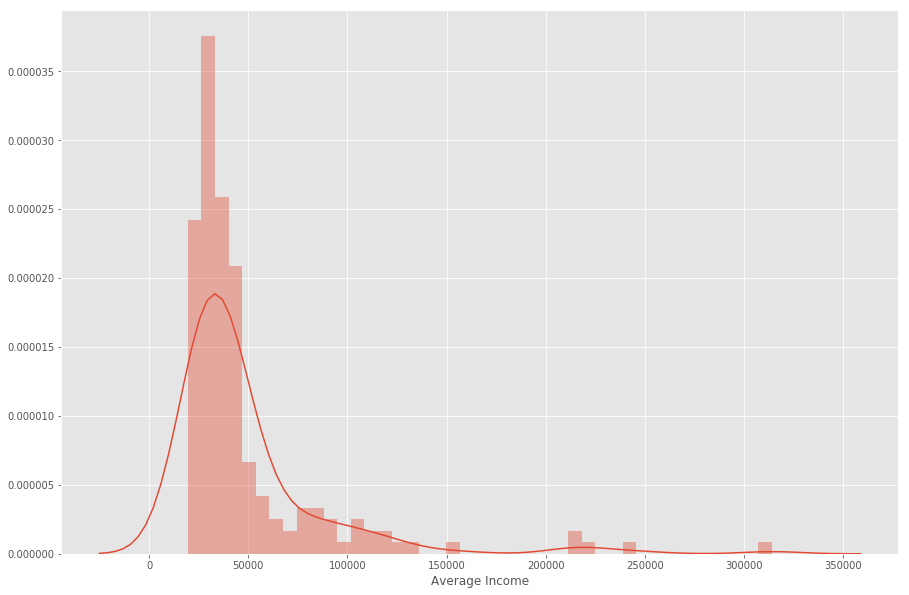

In [16]:
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline
plt.figure(figsize=(15,10))
plt.tight_layout()
seabornInstance.distplot(df_code['Average Income'])

I built a linear model that allows me to predict the income from a combination of information about whether they commute using public transportation and whether they rent.

In [21]:
from sklearn import linear_model
#X = df_code['Transit Commuting\xa0%'].values.reshape(-1,1)
X = df_code[['Transit Commuting\xa0%','% Renters']]
y = df_code['Average Income'].values.reshape(-1,1)
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)
regr = linear_model.LinearRegression()
regr.fit(X, y)
print('Intercept: \n', regr.intercept_)
print('Coefficients: \n', regr.coef_)

# prediction with sklearn model
New_Commuting = 21.75
New_Renters = 21.3
print ('Predicted Income: \n', regr.predict([[New_Commuting ,New_Renters]]))

Intercept: 
 [95378.89519557]
Coefficients: 
 [[-2986.0825566      3.05139686]]
Predicted Income: 
 [[30496.59434245]]


The rest of the work I did was incomplete. I wanted to show how incomes cluster in neighborhoods. I found a map of Toronto that used polygons to show the neighborhoods.

/Users/rmorrisk/Library/Python/3.6/lib/python/site-packages/geopandas/plotting.py:504: FutureWarning: 'axes' is deprecated, please use 'ax' instead (for consistency with pandas)
  FutureWarning,


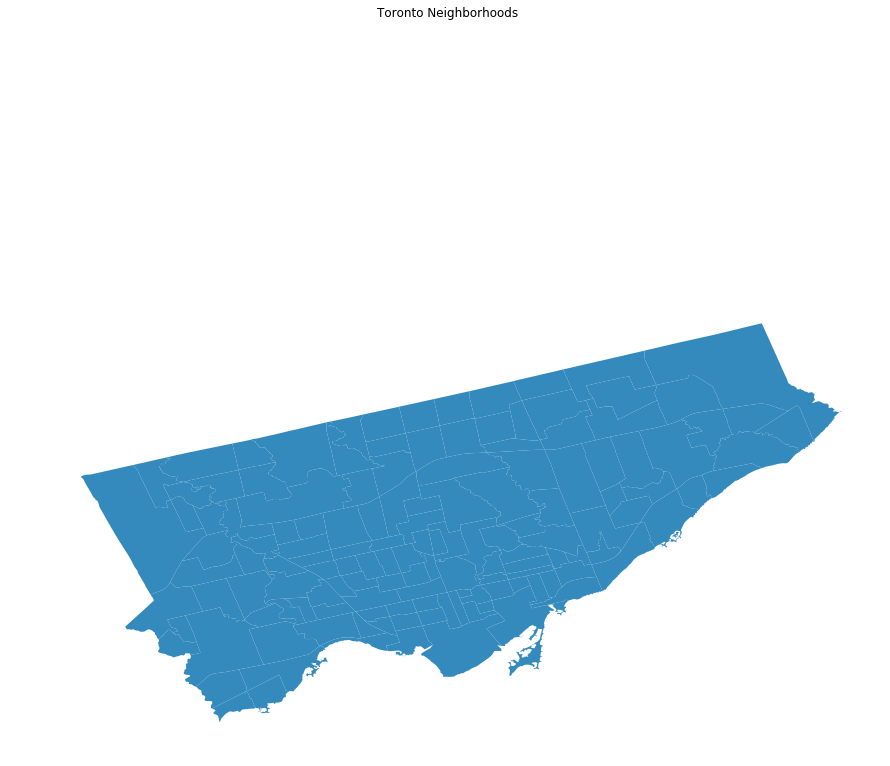

In [203]:
import geopandas as gpd
import geojson
!SHAPE_RESTORE_SHX='YES'
tor = gpd.read_file('toronto_topo.json')
tor.rename(columns={'name':'Name'},inplace=True)#neighborhoods.plot(alpha=1)
#tor.plot(alpha=1)
tor.loc[0, 'geometry']
f, ax = plt.subplots(1, figsize=(15,15))
f.suptitle('Toronto Neighborhoods')
ax = tor.plot(axes=ax)
ax.set_axis_off()
plt.show()

I wanted to join thw tor dataframe to the df_code dataframe to create a new dataframe that had columns for neighborhood name, average income, and 'geometry' which is a polygon of coordinates for each neighborhood. First, I defined the new  dataframe called 'neighborhoods' with those three columns.

In [ ]:
df_code.drop(df_code.index[0],inplace=True)
column_names = ['Name', 'Average Income', 'geometry'] 
# instantiate the dataframe
neighborhoods = pd.DataFrame(columns=column_names)

Then I added the rows by doing a join on the values of 'Name'. This was tricky because the names of the neighborhood were not identical in the two dataframes, so I did a string comparison to extract common neighborhoods (this might not work perfectly). 

In [163]:
for data in df_code.iterrows():
    for data2 in tor.iterrows():
        str = data[1].Name
        str2 = data2[1].Name 
        #if str.find(data2[1].Name):
        if str2.find(str) != -1:
            neighborhoods = neighborhoods.append({'Name': data[1]['Name'], 
                              'Average Income' : data[1]['Average Income'], 
                                  'geometry': data2[1]['geometry']},ignore_index=True)

This is what the new dataframe looks like. It looks right but I had a hard time displaying it.

In [191]:
neighborhoods.crs = tor.crs
neighborhoods.head()

,Name,Average Income,geometry
0,Agincourt,25750,"POLYGON ((-79.24212154354186 43.8024808760853,..."
1,Agincourt,25750,POLYGON ((-79.25496136030053 43.78123545559206...
2,Alderwood,35239,POLYGON ((-79.54865251587448 43.59021881319863...
3,Amesbury,27546,POLYGON ((-79.50295324969666 43.69573224520902...
4,Banbury,92319,POLYGON ((-79.33053285322302 43.73978767142565...


Here's the top five neighborhoods by income. I wanted first to add a different fill color to the overall map for these neighborhoods.

In [171]:
largest = neighborhoods.sort_values(by='Average Income',ascending=False).head(5)
largest

,Name,Average Income,geometry
12,Bridle Path,314107,POLYGON ((-79.39006767705101 43.72768272253995...
50,Lawrence Park,214110,POLYGON ((-79.39006767705101 43.72768272253995...
49,Lawrence Park,214110,POLYGON ((-79.41097823577228 43.70407669976968...
80,Rosedale,213941,POLYGON ((-79.36339230264217 43.67531029062636...
62,Moore Park,154825,POLYGON ((-79.36339230264217 43.67531029062636...


This is as far as I got before the deadline.